In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from keras.preprocessing.image import ImageDataGenerator

# turn photo to array of pixels
train_datagen=ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, 
height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen=ImageDataGenerator(rescale=1.0/255.)

In [13]:
train_data= train_datagen.flow_from_directory('/content/drive/MyDrive/skin_5class/train',
                target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=False)
test_data= test_datagen.flow_from_directory('/content/drive/MyDrive/skin_5class/val',
                target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=False)


Found 8051 images belonging to 5 classes.
Found 2300 images belonging to 5 classes.


In [14]:
import keras
from keras.models import *
from keras.layers import *
import matplotlib.pyplot as plt 
from keras.preprocessing import image
import PIL
from keras.callbacks import EarlyStopping
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
import tensorflow as tf

In [15]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet201


In [16]:
from keras import layers

In [17]:
from tensorflow.keras.optimizers import RMSprop


In [18]:
base_model = tf.keras.applications.InceptionV3( include_top = False, weights = 'imagenet')
 

In [19]:

# Taking the output of the last convolution block in ResNet50
x = base_model.output
 
# Adding a Global Average Pooling layer
x = GlobalAveragePooling2D()(x)
 
# Adding a fully connected layer having 1024 neurons
x = Dense(1024, activation='relu')(x)
 
# Adding a fully connected layer having 2 neurons which will
# give the probability of image having either dog or cat
predictions = Dense(5, activation='softmax')(x)
# Model to be trained
model = Model(inputs=base_model.input, outputs=predictions)
 
# Training only top layers i.e. the layers which we have added in the end
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001), metrics=['accuracy'])

In [20]:
results=model.fit( 
    train_data,  
    epochs=10,
    validation_data=test_data,steps_per_epoch=len(train_data),validation_steps=len(test_data),
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True))

Epoch 1/10
252/252 [==============================] - 2560s 10s/step - loss: 1.1835 - accuracy: 0.5059 - val_loss: 0.8380 - val_accuracy: 0.6400
Epoch 2/10
252/252 [==============================] - 188s 747ms/step - loss: 0.7959 - accuracy: 0.6813 - val_loss: 0.7273 - val_accuracy: 0.7083
Epoch 3/10
252/252 [==============================] - 181s 721ms/step - loss: 0.7488 - accuracy: 0.6876 - val_loss: 0.7647 - val_accuracy: 0.6513
Epoch 4/10
252/252 [==============================] - 181s 719ms/step - loss: 0.7178 - accuracy: 0.6927 - val_loss: 0.7279 - val_accuracy: 0.6926
Epoch 5/10
252/252 [==============================] - 193s 763ms/step - loss: 0.6886 - accuracy: 0.7091 - val_loss: 0.6360 - val_accuracy: 0.7313
Epoch 6/10
252/252 [==============================] - 201s 799ms/step - loss: 0.6739 - accuracy: 0.7070 - val_loss: 0.6262 - val_accuracy: 0.7304
Epoch 7/10
252/252 [==============================] - 196s 776ms/step - loss: 0.6600 - accuracy: 0.7085 - val_loss: 0.5916 - 

In [21]:
results=model.fit( 
    train_data,  
    epochs=10,
    validation_data=test_data,steps_per_epoch=len(train_data),validation_steps=len(test_data),
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True))

Epoch 1/10
252/252 [==============================] - 191s 759ms/step - loss: 0.6034 - accuracy: 0.7421 - val_loss: 0.5876 - val_accuracy: 0.7535
Epoch 2/10
252/252 [==============================] - 189s 751ms/step - loss: 0.6034 - accuracy: 0.7375 - val_loss: 0.5870 - val_accuracy: 0.7452
Epoch 3/10
252/252 [==============================] - 188s 748ms/step - loss: 0.5747 - accuracy: 0.7527 - val_loss: 0.5677 - val_accuracy: 0.7643
Epoch 4/10
252/252 [==============================] - 189s 751ms/step - loss: 0.5705 - accuracy: 0.7574 - val_loss: 0.5698 - val_accuracy: 0.7574
Epoch 5/10
252/252 [==============================] - 198s 788ms/step - loss: 0.5726 - accuracy: 0.7573 - val_loss: 0.5660 - val_accuracy: 0.7617
Epoch 6/10
252/252 [==============================] - 189s 748ms/step - loss: 0.5807 - accuracy: 0.7450 - val_loss: 0.5515 - val_accuracy: 0.7635
Epoch 7/10
252/252 [==============================] - 195s 770ms/step - loss: 0.5597 - accuracy: 0.7568 - val_loss: 0.5557 -

In [22]:
results=model.fit( 
    train_data,  
    epochs=10,
    validation_data=test_data,steps_per_epoch=len(train_data),validation_steps=len(test_data),
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True))

Epoch 1/10
252/252 [==============================] - 187s 744ms/step - loss: 0.5562 - accuracy: 0.7575 - val_loss: 0.5497 - val_accuracy: 0.7696
Epoch 2/10
252/252 [==============================] - 180s 715ms/step - loss: 0.5398 - accuracy: 0.7685 - val_loss: 0.5508 - val_accuracy: 0.7661
Epoch 3/10
252/252 [==============================] - 179s 712ms/step - loss: 0.5412 - accuracy: 0.7657 - val_loss: 0.5560 - val_accuracy: 0.7587
Epoch 4/10
252/252 [==============================] - 178s 708ms/step - loss: 0.5361 - accuracy: 0.7654 - val_loss: 0.5396 - val_accuracy: 0.7717
Epoch 5/10
252/252 [==============================] - 178s 707ms/step - loss: 0.5445 - accuracy: 0.7628 - val_loss: 0.5545 - val_accuracy: 0.7687
Epoch 6/10
252/252 [==============================] - 178s 705ms/step - loss: 0.5367 - accuracy: 0.7731 - val_loss: 0.5260 - val_accuracy: 0.7778
Epoch 7/10
252/252 [==============================] - 178s 704ms/step - loss: 0.5354 - accuracy: 0.7684 - val_loss: 0.5487 -

In [23]:
test_loss, test_acc = model.evaluate(test_data)
print('test loss :{}   test accuracy :{}'.format(test_loss,test_acc))

72/72 [==============================] - 24s 341ms/step - loss: 0.5274 - accuracy: 0.7678
test loss :0.5274382829666138   test accuracy :0.7678260803222656


Text(0.5, 0, 'epoch')

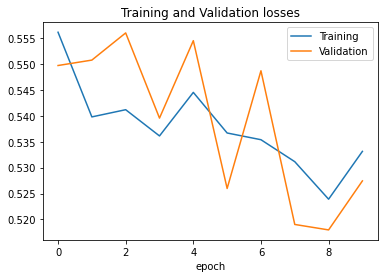

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

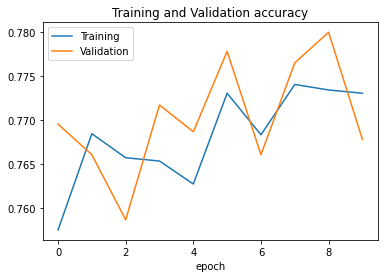

In [25]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')